<a href="https://colab.research.google.com/github/shreshthsk/MLProjects/blob/main/Traffic_Signal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreshthkaushal","key":"921148a2dca7d5dd188bd9c6fe234971"}'}

Installing Kaggle API using pip

In [3]:
!pip install -q kaggle

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Setting Up Kaggle using Kaggle API

In [6]:
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [7]:
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          89663       1002  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          11765        265  1.0              
ibrahimkaratas/gtsrb-german-traffic-sign-recognition-benchmark     GTSRB German Traffic Sign Recognition Benchmark    231MB  2023-01-08 16:48:07             45          9  0.4375           
harbhajansingh21/german-traffic-sign-dataset      

Download Dataset

In [8]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

 97% 593M/612M [00:08<00:00, 91.1MB/s]
100% 612M/612M [00:08<00:00, 73.6MB/s]
/content


In [9]:
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/train
!rm -rf traffic_sign_dataset/test
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

Importing Libraries

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

Visualizing

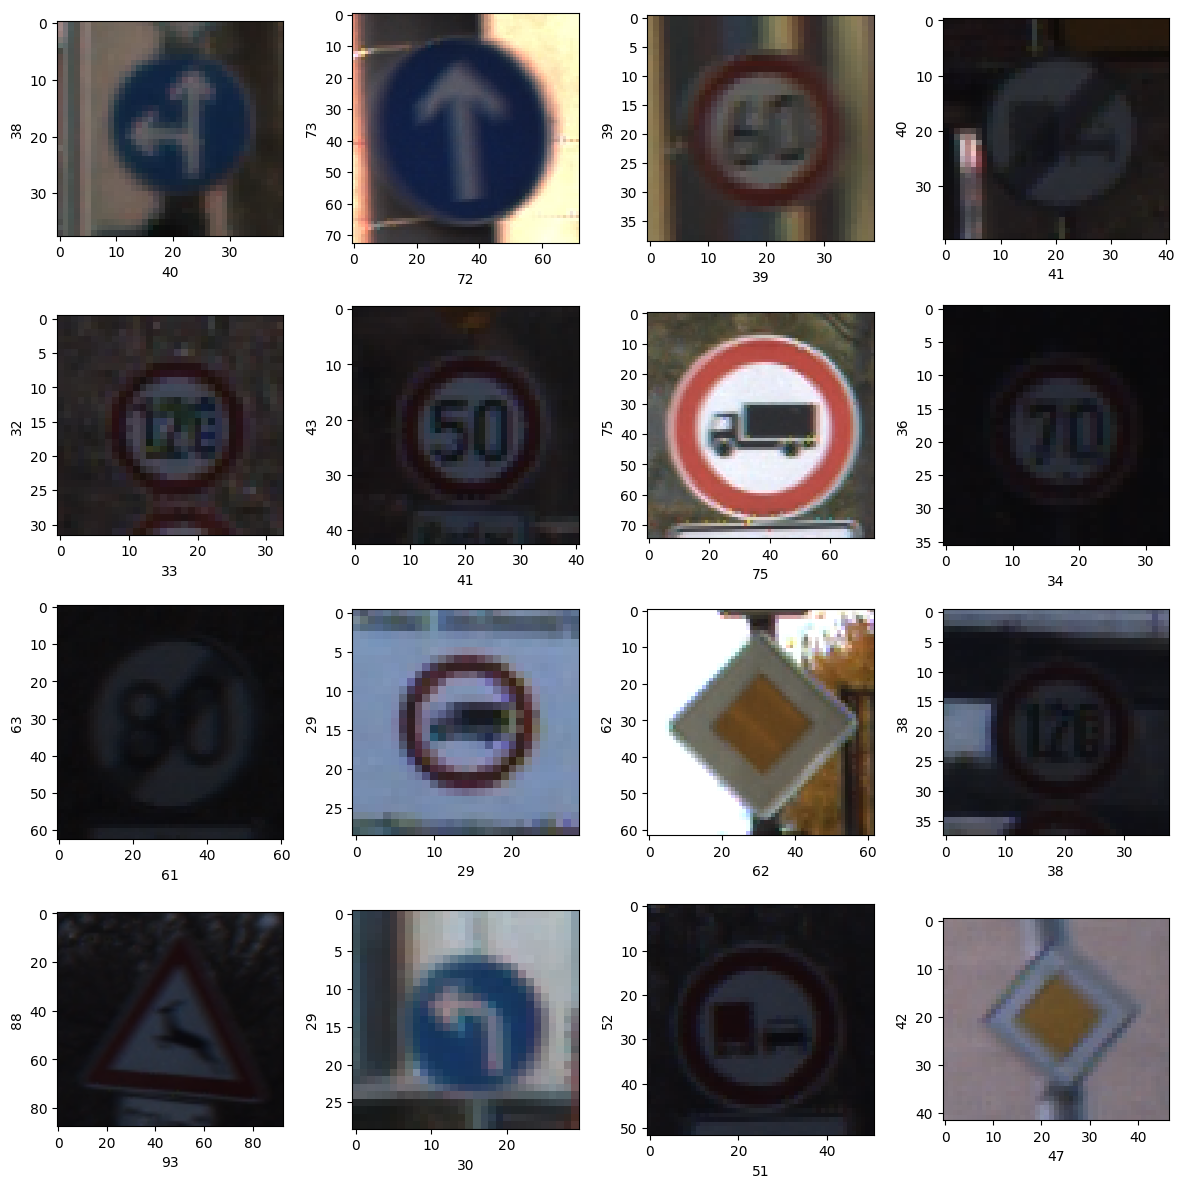

In [12]:
plt.figure(figsize = (12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path+'/'+random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1],fontsize = 10)
  plt.ylabel(rand_img.shape[0],fontsize = 10)

In [15]:
dim1 = []
dim2 = []
for i in range(0,43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  imagepath = os.listdir(labels)
  for x in imagepath:
    img = imread(labels + '/'+x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])


Mean of the Dimensions to get same dimension

In [16]:
print("Mean of the dimension of the image is: ",np.mean(dim1)," and ",np.mean(dim2))

Mean of the dimension of the image is:  50.328929582493814  and  50.83587951745773


In [23]:
images = []
label_id = []
for i in range(43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  imagepath = os.listdir(labels)
  for x in imagepath:
    img = Image.open(labels+'/'+x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    label_id.append(i)

Normalize Images

In [24]:
images = np.array(images)
images = images/255

In [25]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [26]:
images.shape

(39209, 50, 50, 3)

Check balance or not

In [27]:
labels_count = pd.DataFrame(label_id).value_counts()
labels_count.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

Split The Data

In [28]:
x_train,x_val,y_train,y_val = train_test_split(images,label_id,test_size = 0.2,random_state = 42)

One Hot Encoding

In [29]:
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

Modelling

In [30]:
model = Sequential()
model.add(Conv2D(filters = 64,kernel_size = (3,3),input_shape = x_train.shape[1:],activation = 'relu',padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43,activation= 'softmax'))

In [31]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer= 'adam',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

Fitting the model

In [32]:
model.fit(x_train,y_train,epochs = 50,batch_size = 128,validation_data = (x_val,y_val),verbose = 2)

Epoch 1/50
246/246 - 272s - loss: 2.4524 - accuracy: 0.3317 - val_loss: 1.1436 - val_accuracy: 0.7461 - 272s/epoch - 1s/step
Epoch 2/50
246/246 - 261s - loss: 1.0697 - accuracy: 0.6635 - val_loss: 0.4580 - val_accuracy: 0.9046 - 261s/epoch - 1s/step
Epoch 3/50
246/246 - 268s - loss: 0.6904 - accuracy: 0.7798 - val_loss: 0.2489 - val_accuracy: 0.9533 - 268s/epoch - 1s/step
Epoch 4/50
246/246 - 263s - loss: 0.5427 - accuracy: 0.8241 - val_loss: 0.1749 - val_accuracy: 0.9675 - 263s/epoch - 1s/step
Epoch 5/50
246/246 - 255s - loss: 0.4390 - accuracy: 0.8574 - val_loss: 0.1409 - val_accuracy: 0.9642 - 255s/epoch - 1s/step
Epoch 6/50
246/246 - 262s - loss: 0.3905 - accuracy: 0.8731 - val_loss: 0.1112 - val_accuracy: 0.9793 - 262s/epoch - 1s/step
Epoch 7/50
246/246 - 262s - loss: 0.3571 - accuracy: 0.8828 - val_loss: 0.1092 - val_accuracy: 0.9805 - 262s/epoch - 1s/step
Epoch 8/50
246/246 - 263s - loss: 0.3205 - accuracy: 0.8958 - val_loss: 0.0855 - val_accuracy: 0.9844 - 263s/epoch - 1s/step


Plot the result

<Axes: >

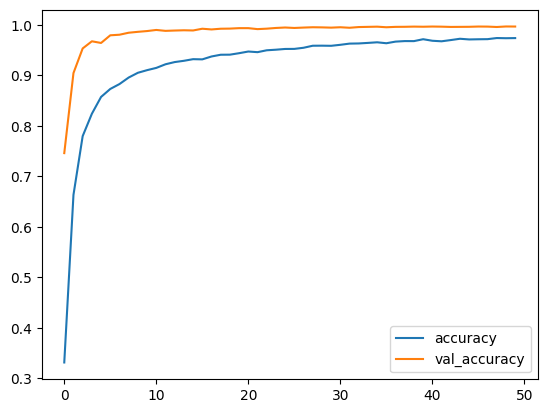

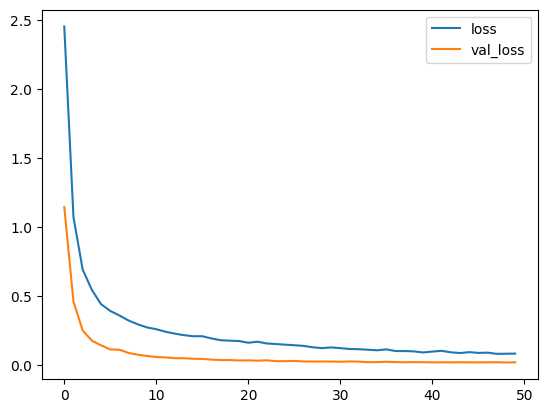

In [33]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy','val_accuracy']].plot()
evaluation[['loss','val_loss']].plot()

In [54]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

rm: cannot remove 'traffic_sign_dataset/Test/GT-final_test.csv': No such file or directory


In [37]:
def scaling(test_images, test_path):
  images2 = []
  image_path2 = test_images
  for x in image_path2:
    img = Image.open(test_path + '/' +x)
    img = img.resize((50,50))
    img = np.array(img)
    images2.append(img)

  images2 = np.array(images2)
  images2 = images2/255
  return images2

In [38]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [40]:
test = pd.read_csv("traffic_sign_dataset/Test.csv")
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [52]:
predict_y = model.predict(test_images)
y_pred=np.argmax(predict_y,axis=1)
y_pred

395/395 [==============================] - 23s 58ms/step


array([16,  1, 38, ...,  5,  7, 10])

In [41]:
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

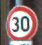

In [55]:
# Visualize test image
img = Image.open(test_path +'/00001.png')
img

In [45]:
# Original label
print("Original label : ",all_lables[y_test[1]])

Original label :  Speed limit (30km/h)


In [53]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[1]])

Predicted label :  Speed limit (30km/h)
